<a href="https://colab.research.google.com/github/hussain0048/Machine-Learning/blob/master/Statistics_for_Machine_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libaray**

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

# **Introduction**

# **Data Loading**

**Load data from google drive** 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/MyDrive/Datasets/Recommended System/Placement_Data_Full_Class.csv")

FileNotFoundError: ignored

In [ ]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# **Preprocessing**

**Check Missing Value**


In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
salary,67,0.311628
status,0,0.000000
mba_p,0,0.000000
specialisation,0,0.000000


In [ ]:
missing_v = [col for col in data.columns if (data[col].isnull().sum()/data.shape[0]) * 100 > 0.001]
print(len(missing_v))
for cols in missing_v:
    del data[cols]

1


In [ ]:
np.sum(data.isnull().any(axis=1))

0

**Hot Encoding**

In [ ]:
data.select_dtypes(include=['object']).columns

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')

In [ ]:
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
data['ssc_b'] = data['ssc_b'].fillna(data['ssc_b'].mode()[0])
data['hsc_b'] = data['hsc_b'].fillna(data['hsc_b'].mode()[0])
data['hsc_s'] = data['hsc_s'].fillna(data['hsc_s'].mode()[0])
data['degree_t'] = data['degree_t'].fillna(data['degree_t'].mode()[0])
data['workex'] = data['workex'].fillna(data['workex'].mode()[0])
data['specialisation'] = data['specialisation'].fillna(data['specialisation'].mode()[0])
data['status'] = data['status'].fillna(data['status'].mode()[0])




In [ ]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in data.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    data[col] = lencoders[col].fit_transform(data[col])

In [ ]:
data

**Feature Scaling**

In [ ]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(data)
data = pd.DataFrame(r_scaler.transform(data), index=data.index, columns=data.columns)

**Data spliting**


In [ ]:
X=data.drop('specialisation',axis=1)


In [ ]:
y=data[['specialisation']]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)


# **Correlation**

Correlation is a statistical technique that can show whether and how strongly pairs of variables are related/interdependent. When we look at two variables over time if one variable changes how does this affect change in another variable.

EvalML is an AutoML library that builds, optimizes, and evaluates machine learning pipelines using domain-specific objective functions.

**Correlation measures to what extend different variables are interdependent.**


For example, lung cancer and smoking are related; smokers tend to develop lung cancer more than non-smokers. The relationship isn't perfect. You can easily think of two people you know who smoke but don't have lung cancer. Nonetheless, the average cancer development in smokers is higher than in non-smokers. Correlation can tell you just how much of the variation in chances of getting cancer is related to their cigarette consumption.

Although this correlation is fairly obvious, your data may contain unsuspected correlations. You may also suspect there are correlations but don't know which are the strongest. Intelligent correlation analysis can lead to a greater understanding of your data.

The long and short of correlation is the following: Correlation is a number between –1.0 and +1.0. A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.

- **Positive Correlation:** both variables change in the same direction.
- **Neutral Correlation**: No relationship in the change of the variables.
- **Negative Correlation:** variables change in opposite directions.

It is important to note that correlation doesn't imply causation. Correlation quantifies the strength of the relationship between the features of a dataset. In some cases, the association is caused by a factor common to several features of interest. (For example, umbrellas are used during the rain, but they don't cause rain).

There are several statistics that you can use to quantify correlation. In this article, you’ll learn about three correlation coefficients:

- **Pearson’s r**
- **Spearman’s ρ (rho)**
- **Kendall’s τ (tau)**

**Pearson’s** coefficient measures linear correlation, while the S**pearman and Kendall** coefficients compare the ranks of data.

Correlation can be useful in data analysis and modelling to better understand the relationships between variables. So it is important that you have a good understanding of it before you attempt a data analysis or modelling

## **- Pearson correlation - Linear correlation**

One way to measoure the strenth of corelation between continuose numerical variables is to use Pearson correlation. Pearson correlation method will give you two values:

- **correlation coefficient**
- **p-value**

The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples.

Several conditions have to be met for Pearson correlation:

- The variables x and y must have a linear relationship.
- Both variables x and y must be numerical (or quantitative). That is, they must represent measurements with no restriction on their level of precision. For example, numbers with many places after the decimal point (such as 11.332 or 0.229) must be possible.
- The y values must have a normal distribution for each x, with the same variance at each x.

The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score.

Correlation coefficient and p-value will tell you the following:

Correlation coefficient

- close to +1: Large Positive relationship
- close to -1: Large Negative relationship
- close to 0: No relationship

P-value

- P-value <0.001: Strong certainty in the result
- P-value <0.05:  Moderate certainty in the result
- P-value <0.1: Weak certainty in the result
- P-value > 0.1: No certainty in the result

The Pearson’s correlation coefficient can be used to evaluate the relationship between more than two variables.

This can be done by calculating a matrix of the relationships between each pair of variables in the dataset. The result is a symmetric matrix called a correlation matrix with a value of 1.0 along the diagonal as each column always perfectly correlates with itself.

## **- Spearman Correlation - Rank correlation**

Pearson’s correlation coefficient is the most common correlation measure out there, but it is not the only one out there. Pearson’s correlation can't be used in all cases. It can be used only when certain conditions are met (those are listed above). If those conditions are not met, the rank correlation can be used (Spearman and Kendall correlation).

Pearson correlation assumes that the data we are comparing is normally distributed. When that assumption is not true, the correlation value is reflecting the true association. Spearman correlation does not assume that data is from a specific distribution, so it is a non-parametric correlation measure.

Spearman’s rank correlation doesn’t require the relationship between the variables x and y to be linear, nor does it require the variables to be numerical. You use Spearman’s rank when the variables are ordinal or/and quantitative. Rather than examining a linear relationship between x and y, Spearman’s rank correlation tests whether two ordinal or/and quantitative variables are dependent.

Note that Spearman’s rank applies to ordinal data only.

Spearman's correlation coefficient, (ρ, also signified by rs) measures the strength and direction of the association between two ranked variables. You interpret the value of Spearman’s rank correlation, ρ the same way you interpret Pearson’s correlation, r. The values of ρ can go between –1 and +1. The higher the magnitude of ρ (in the positive or negative directions), the stronger the relationship.

## **- Kendall correlation - Rank correlation**

The Kendall correlation coefficient compares the number of concordant and discordant pairs of data. This coefficient is based on the difference in the counts of concordant and discordant pairs relative to the number of x-y pairs. It’s often denoted with τ called Kendall’s tau. It is considered an alternative to the nonparametric Spearman correlation coefficient (especially when you have a small sample size with many tied ranks).

Important facts about the Kendall correlation coefficient are:

- It can take a real value in the range −1 ≤ τ ≤ 1.
- Its maximum value τ = 1 corresponds to the case when the ranks of the corresponding values in x and y are the same. In other words, all pairs are concordant.
- Its minimum value τ = −1 corresponds to the case when the rankings in x are the reverse of the rankings in y. In other words, all pairs are discordant.

## **Correlation Calculation in Pandas**

Pandas offers **.corr()** function that we can use to calculate correlation coefficient.

Pandas **dataframe.corr()**is used to find the pairwise correlation of all columns in the dataframe. Any NA values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

In [ ]:
data.corr(method='pearson', min_periods=1)



,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


**Parameters:**

**methods :**

- pearson : Standard correlation coefficient
- kendall : Kendall Tau correlation coefficient
- spearman : Spearman rank correlation

**min_periods :** Minimum number of observations required per pair of columns to have a valid result. Currently only available for Pearson and Spearman correlation.

- It returns a dataframe (Correlation matrix).

- Let's create a datasets to illustare how the function works.

- Here we are creating a dataframe with two columns that have positive correlation.

d1: mean=101.554 stdv=29.851
d2: mean=151.104 stdv=35.806


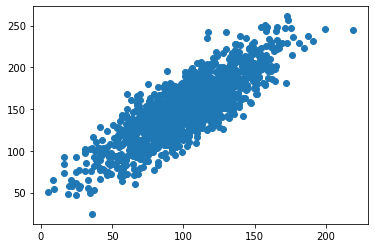

In [ ]:
# creating a datasets to illustrate positive correlation.

# importing libraries
import numpy as np
import pandas as pd

from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot

# seed random number generator
seed(1)

# creating data for columns
d1 = 30 * randn(1500) + 100
d2 = d1 + (20 * randn(1500) + 50)

# let's convert to a dataframe
df = pd.DataFrame({'Column1': d1, 'Column2': d2})

# summarize
print('d1: mean=%.3f stdv=%.3f' % (mean(d1), std(d1)))
print('d2: mean=%.3f stdv=%.3f' % (mean(d2), std(d2)))

# plot
pyplot.scatter(d1, d2)
pyplot.show()


In [ ]:
df.head()

Now let's calculate Pearson Correlation Coefficient with Pandas .corr() and prove that we are dealing with the positive correlation.

You will need to run  df.corr(method ='pearson') to get Pearson correlation coefficient for your dataframe.

In [ ]:
df.corr(method='pearson')


,Column1,Column2
Column1,1.000000,0.831948
Column2,0.831948,1.000000


This is what we expected for the dataframe as it was created to show a positive correlation.

A correlation coefficient close to +1 demonstrates a large positive relationship. Any column correlation with self will result in 1. Here the correlation between column1 and column2 is **0.83**, which is close to +1, and so this confirms that we are dealing with positive correlation.

Let's calculate **Spearman  Correlation Coefficient** with Pandas .corr() and prove that we are dealing with the positive correlation.

You will need to run  df.corr(method ='spearman') to get Pearson Correlation Coefficient for your dataframe.

In [ ]:
df.corr(method='spearman')


,Column1,Column2
Column1,1.000000,0.808668
Column2,0.808668,1.000000


Finally, let's calculate **Kendall  Correlation Coefficient**with Pandas .corr() and prove that we are dealing with the positive correlation.

You will need to run  df.corr(method ='kendall') to get Pearson Correlation Coefficient for your dataframe.



In [ ]:
df.corr(method='kendall')


,Column1,Column2
Column1,1.000000,0.615858
Column2,0.615858,1.000000


The first thing that strikes when comparing correlation coefficients for the test dataframe computed by Pearson and Spearman and Kendall correlation coefficients is the difference between them. Why are they different? We can understand the difference if we understand the assumption of each method.

As mentioned before, Pearson's correlation assumes the data is normally distributed. However, Spearman's and Kendall's correlations don't make any assumption on the distribution of the data. That is the main reason for the difference.

## **Correlation Calculation in SciPy**

**Correlation Calculation in SciPy**


Pandas does not have a function that calculates **p-values**, so it is better to use **SciPy **to calculate correlation as it will give you both **p-value** and **correlation coefficient.**

SciPy library has many statistics routines contained in **scipy.stats.** You can use the following methods to calculate the three correlation coefficients you saw earlier:



- pearsonr()
- spearmanr()
- kendalltau()

That's how you would use these functions in Python:

We will create a new test dataframe this time with negative correlation.

d1: mean=100.408 stdv=30.396
d2: mean=-51.359 stdv=36.784


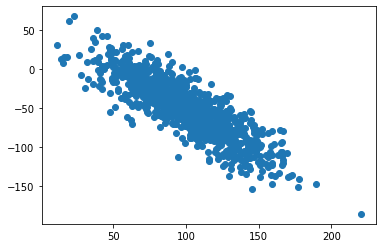

In [ ]:
# creating a datasets to illustrate negative correlation.

# importing libraries
import numpy as np
import pandas as pd
import scipy

from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot

# seed random number generator
seed(24)

# prepare data
d1 = 30 * randn(1000) + 100
d2 = d1 * -1 + (20 * randn(1000) + 50)

# let's convert to a dataframe
df = pd.DataFrame({'Column1': d1, 'Column2': d2})

# summarize
print('d1: mean=%.3f stdv=%.3f' % (mean(d1), std(d1)))
print('d2: mean=%.3f stdv=%.3f' % (mean(d2), std(d2)))

# plot
pyplot.scatter(d1, d2)
pyplot.show()


he **scipy.stats.pearsonr(x, y)** calculates a Pearson correlation coefficient and the **p-value** for testing non-correlation.

The Pearson correlation coefficient measures the linear relationship between two datasets.

The **p-value** roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

In [ ]:
scipy.stats.pearsonr(df['Column1'], df['Column2'])

(-0.8494613723907997, 2.370666878292138e-279)

In [ ]:
corr, pvalue=scipy.stats.pearsonr(df['Column1'], df['Column2'])

In [ ]:
print('correlation coefficent', corr)

correlation coefficent -0.8494613723907997


In [ ]:
print('P-VALUE', pvalue)

P-VALUE 2.370666878292138e-279


In [ ]:
print('P-value without a notations','{:0.300f}'.format(pvalue))

P-value without a notations 0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000002370666878292137817821


As expected, the function produced correlation coefficient -0.8494613, that is close to -1, and it confirms a strong negative correlation. The returned p-value is < 0.001, and so it confirms strong certainty in the result.

**Spearman correlation coefficient and the p-value**

The scipy.stats.spearmanr(a, b=None, axis=0, nan_policy='propagate') calculates a Spearman correlation coefficient with associated p-value.

The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets.

**Parameters:**

- a, b: 1D or 2D array_like, b is optional. One or two 1-D or 2-D arrays containing multiple variables and observations. When these are 1-D, each represents a vector of observations of a single variable. For the behavior in the 2-D case, see under axis, below. Both arrays need to have the same length in the axis dimension.
- axis : int or None, optional. If axis=0 (default), then each column represents a variable, with observations in the rows. If axis=1, the relationship is transposed: each row represents a variable, while the columns contain observations. If axis=None, then both arrays will be raveled.
- nan_policy : {‘propagate’, ‘raise’, ‘omit’}, optional. Defines how to handle when input contains nan. The following options are available (default is propagate): propagate: returns nan, raise: throws an error, and omit: performs the calculations ignoring nan values

The scipy.stats.spearmanr(a, b=None, axis=0, nan_policy='propagate') function returns:

- **correlation** : float or ndarray (2-D square). Spearman correlation matrix or correlation coefficient (if only 2 variables are given as parameters. Correlation matrix is square with length equal to total number of variables (columns or rows) in a and b combined.
- **p-value :** float. The two-sided p-value for a hypothesis test whose null hypothesis is that two sets of data are uncorrelated, has same dimension as rho.

In [ ]:
scipy.stats.spearmanr(df)

SpearmanrResult(correlation=-0.8516826716826716, pvalue=2.5840062112066416e-282)

In [ ]:
corr, Pvalue=scipy.stats.spearmanr(df)

In [ ]:
print('correlation coefficent', corr)

In [ ]:
print('P-VALUE', Pvalue)

P-VALUE 2.5840062112066416e-282


We know that the data is Gaussian and that the relationship between the variables is linear. Nevertheless, the nonparametric rank-based approach shows a strong correlation between the variables of 0.85. Returned p-value is < 0.001 and so confirms strong certainty in the result.

**Kendall correlation coefficient and the p-value**


The scipy.stats.kendalltau(x, y, nan_policy='propagate', method='auto') calculates Kendall’s tau, a correlation measure for ordinal data.

Kendall’s tau is a measure of the correspondence between two rankings. Values close to 1 indicate strong agreement, values close to -1 indicate strong disagreement.

**Parameters:**

- **x, yarray_like.**  Arrays of rankings, of the same shape. If arrays are not 1-D, they will be flattened to 1-D.
- **nan_policy : {‘propagate’, ‘raise’, ‘omit’}, optional.** Defines how to handle when input contains nan. The following options are available (default is propagate): propagate: returns nan, raise: throws an error, and omit: performs the calculations ignoring nan values.
- method: {‘auto’, ‘asymptotic’, ‘exact’}, optional. Defines which method is used to calculate the p-value. The following options are available (default is auto): auto: selects the appropriate method based on a trade-off between speed and accuracy. asymptotic: uses a normal approximation valid for large samples. exact: computes the exact p-value, but can only be used if no ties are present.
The scipy.stats

The scipy.stats.kendalltau(x, y, nan_policy='propagate', method='auto') function returns:

**correlation float**
- The tau statistic - p-value float. The two-sided p-value for a hypothesis test whose null hypothesis is an absence of association, tau = 0.

In [ ]:
scipy.stats.kendalltau(df['Column1'], df['Column2'])

KendalltauResult(correlation=-0.6591271271271271, pvalue=7.67043823229759e-214)

In [ ]:
corr, pvalue=scipy.stats.kendalltau(df['Column1'], df['Column2'])

In [ ]:
print('correlation coefficent', corr)

correlation coefficent -0.6591271271271271


In [ ]:
print('P-VALUE', pvalue)

P-VALUE 7.67043823229759e-214


## **Visualization of Correlation with Matplotlib and Seaborn**

The fastest way to learn more about your data is to use data visualization. In this section, you’ll learn how to visually represent the relationship between two features with an x-y plot. You’ll also use heatmaps to visualize a correlation matrix and scatterplot matrix.

**Scatterplot matrix**


Scatter plots are useful for spotting structured relationships between variables, like whether you could summarize the relationship between two variables with a line. Attributes with structured relationships may also be correlated and good candidates for removal from your dataset. You don't need to delete anything from the test dataframe, but when dealing with real world data this can be necessary.

pandas.plotting.scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05, **kwargs) - The command syntax for a scatterplot matrix.

For scatterplt matrix we are using the same test df as in SciPy section.

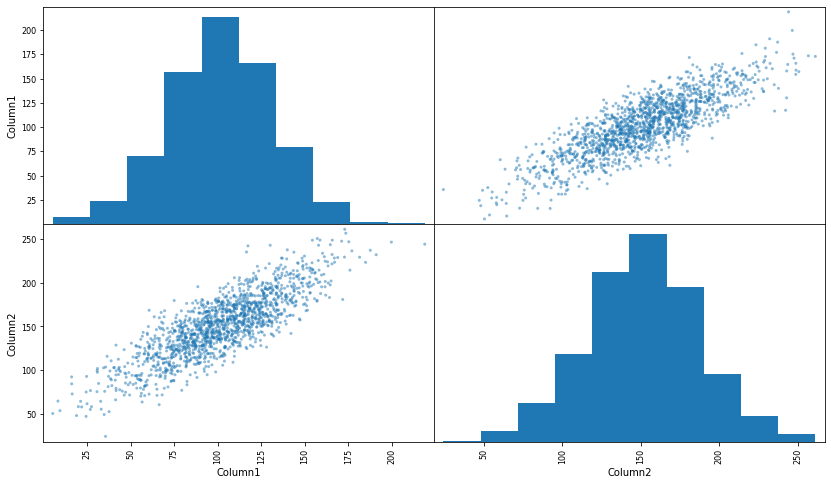

In [ ]:
#Scatterplot Matrix - Histogram plots

#import pandas
#from matplotlib import pyplot

from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize = (14,8))
pyplot.show()

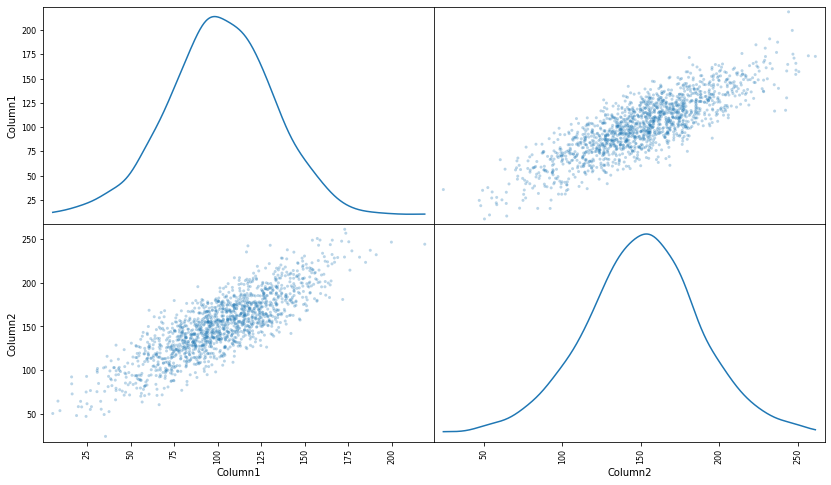

In [ ]:
# Scatterplot Matrix - Kernel Density Estimation

scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
pyplot.show()

**X-Y Plots With a Regression Line**


Now you’ll see how to create an x-y plot with the regression line, its equation, and the Pearson correlation coefficient. The slope and the intercept of the regression line, as well as the correlation coefficient are calculated with linregress().

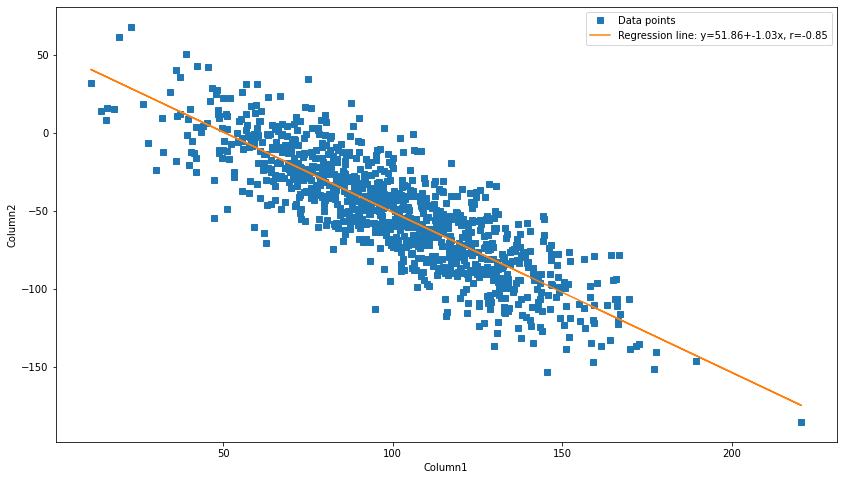

In [ ]:
# creating X-Y Plots With a Regression Line

# slope, intersept, and correlation coefficient calculation 
slope, intercept, r, p, stderr = scipy.stats.linregress(df['Column1'], df['Column2'])

line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

# plotting
fig, ax = pyplot.subplots(figsize = (14,8))
ax.plot(df['Column1'], df['Column2'], linewidth=0, marker='s', label='Data points')
ax.plot(df['Column1'], intercept + slope * df['Column1'], label=line)
ax.set_xlabel('Column1')
ax.set_ylabel('Column2')
ax.legend(facecolor='white')
pyplot.show()

**Heatmaps of Correlation Matrices**


You can calculate the correlation between each pair of attributes. This is called a correlation matrix. You can then plot the correlation matrix and get an idea of which variables have a high correlation with each other.

The easiest way to get a pretty heatmap is to use seaborn library. So let's do this.

seaborn.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs) - Plots rectangular data as a color-encoded matrix.

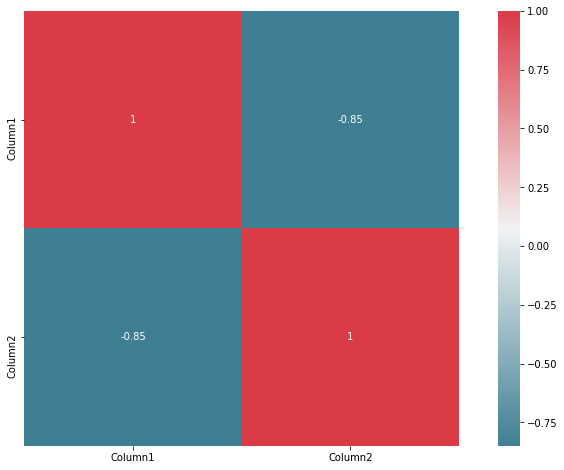

In [ ]:
import seaborn as sns

f, ax = pyplot.subplots(figsize=(14, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot=True, ax=ax)

The command returns a table with the coefficients. It sort of looks like the Pandas output with colored backgrounds. The colors help you interpret the output. In this example, the red color represents the number 1, blue corresponds to -0.85.

# **References**

# **Measures of central tendency and dispersion**

## **Central Tendency** 

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

For the normally distributed dataset:
Mean:  50.40276547730953
Median:  48.89989270327049
Mode:  50.0
--------------------------------------------------------------------
For the skewed dataset:
Mean:  389273771.93103933
Median:  268860386.53533196
Mode:  389273772.0


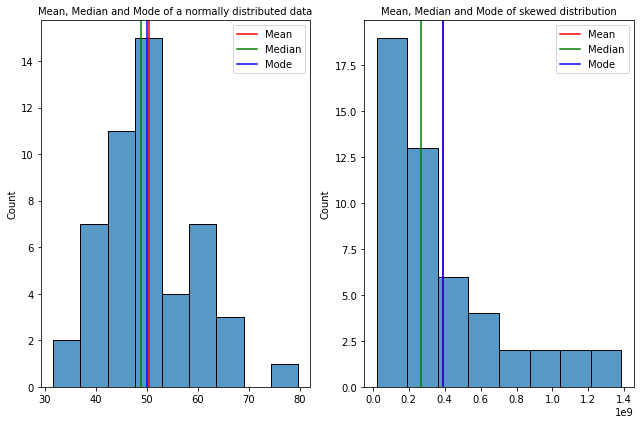

In [3]:
# Generate a normally distributed dataset with mean=50 and standard deviation=10
data = np.random.normal(50, 10, 50)

# Generate a skewed dataset with mean=50 and standard deviation=10
data_skewed = np.random.normal(50, 10, 50)**5

# Calculate the mean, median, and mode of the dataset
mean = np.mean(data)
median = np.median(data)
mode = np.round(np.mean(data))

# Calculate the mean, median, and mode of the skewed dataset
mean_skewed = np.mean(data_skewed)
median_skewed = np.median(data_skewed)
mode_skewed = np.round(np.mean(data_skewed))

# Print the results
print("For the normally distributed dataset:")
print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode)
print("--------------------------------------------------------------------")
print("For the skewed dataset:")
print("Mean: ", mean_skewed)
print("Median: ", median_skewed)
print("Mode: ", mode_skewed)


fig, ax= plt.subplots(1,2, figsize = (9,6))


# Plot a histogram of the dataset using the seabron library
sns.histplot(data, ax=ax[0])
ax[0].axvline(x=mean, color='r', label='Mean')
ax[0].axvline(x=median, color='g', label='Median')
ax[0].axvline(x=mode, color='b', label='Mode')
ax[0].legend()
ax[0].set_title("Mean, Median and Mode of a normally distributed data", fontsize=10)

sns.histplot(data_skewed, ax=ax[1])
ax[1].axvline(x=mean_skewed, color='r', label='Mean')
ax[1].axvline(x=median_skewed, color='g', label='Median')
ax[1].axvline(x= mode_skewed, color='b', label='Mode')
ax[1].set_title("Mean, Median and Mode of skewed distribution", fontsize=10)

ax[1].legend()

plt.tight_layout()

## **Measures of dispersion**


**Range**

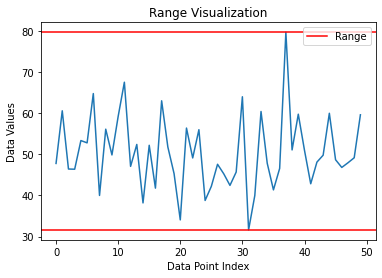

The minimum value is 31.618403135931473
The maximum value is 79.68173964580336
The range  is 48.06333650987189


In [4]:
# Calculate the range
range_min = np.min(data)
range_max = np.max(data)

# Create a line plot with the range represented by two horizontal lines
fig, ax = plt.subplots()
ax.plot(data)
ax.axhline(y=range_min, color='r', label='Range')
ax.axhline(y=range_max, color='r')
ax.legend()
ax.set_title("Range Visualization")
ax.set_xlabel("Data Point Index")
ax.set_ylabel("Data Values")
plt.show()
print(f"The minimum value is {range_min}")
print(f"The maximum value is {range_max}")
print(f"The range  is {range_max-range_min}")


**Standard deviation**

Text(0, 0.5, 'Frequency')

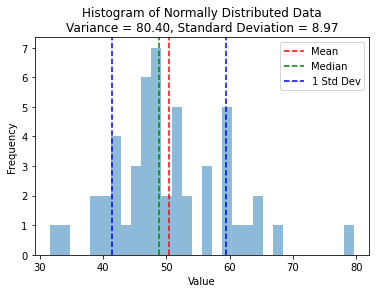

In [5]:
# Calculate the variance and standard deviation of the dataset
variance = np.var(data)
std_dev = np.std(data)

# Create a histogram
plt.hist(data, bins=30, alpha=0.5)
plt.axvline(x=np.mean(data), color='r', linestyle='--', label='Mean')
plt.axvline(x=np.median(data), color='g', linestyle='--', label='Median')
plt.axvline(x=np.mean(data) + std_dev, color='b', linestyle='--', label='1 Std Dev')
plt.axvline(x=np.mean(data) - std_dev, color='b', linestyle='--')
plt.legend()
plt.title('Histogram of Normally Distributed Data\nVariance = {:.2f}, Standard Deviation = {:.2f}'.format(variance, std_dev))
plt.xlabel('Value')
plt.ylabel('Frequency')

[Exploring Correlation in Python: Pandas, SciPy](https://re-thought.com/exploring-correlation-in-python/)

[How to find the correlation between continuous variables and visualise it using python?](https://medium.com/geekculture/how-to-find-the-correlation-between-continuous-variables-and-visualise-it-using-python-7faf5b028ae0)